In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import random
import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
mnist = fetch_openml('mnist_784', version = 1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [13]:
X, y = mnist["data"], mnist["target"]
X.iloc[0].shape

(784,)

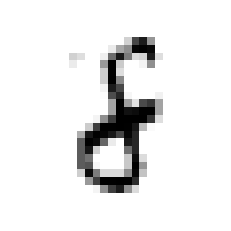

8


In [24]:
random_num = random.randint(0,X.shape[0])
some_digit = np.array(X.iloc[random_num])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
print(y[random_num])